In [2]:
from utils.handle_arguments import initialize_and_grep_files  
from methods.effective_connectivity import RCC

# Use a json file for config
args = "./args.json"
# Create a dict for config
""" args = {
    "dir": "./Datasets/Logistic",
    "r_folder": "Results_test",
    "num_jobs": 1,
    "blocks": "vanilla",
    "num_blocks": None,
    "split": 80,
    "skip": 5,
    "length": 100,
    "subjects": ["sub-11_logistic_TS"],
    "rois": [-1],
    "num_surrogates": 100,
    "min_lag": -20,
    "max_lag": 21,
    "plot": True,
    "runs": 20,
    "logistic": True
} """
opts, files, results_dir, json_config, timeseries_type = initialize_and_grep_files(args=args)
ReservoirComputingCausality = RCC(results_dir, opts, json_config)

Namespace(dir='./Datasets/Logistic', r_folder='Results_test', num_jobs=1, blocks='vanilla', num_blocks=None, split=80, skip=5, length=100, subjects=['sub-11_logistic_TS'], rois=[-1], num_surrogates=100, min_lag=-20, max_lag=21, plot=True, runs=20, logistic=True)


In [5]:
ReservoirComputingCausality.fit(files[0], format='png', factor=10, verbose=True)

++++++++++++++++++++++++++++++++
Participant ID: sub-11_logistic_Length-100_Method-RCC
-------------------------------
Loading data
Done!
-------------------------------
Computing reservoir scores and evidence
Training reservoirs for ROIs [0,1]


KeyboardInterrupt: 

In [ ]:
from analysis.effective_connectivity import Subject_Effective_Connectivity
import matplotlib.pyplot as plt
dir = "Results_test/"
name_subject = 'sub-17_logistic_Length-100_Method-RCC'
ROI_Labels = {1: "Node 1", 2: "Node 2"}
ob = Subject_Effective_Connectivity(dir, name_subject, ROI_Labels=ROI_Labels)

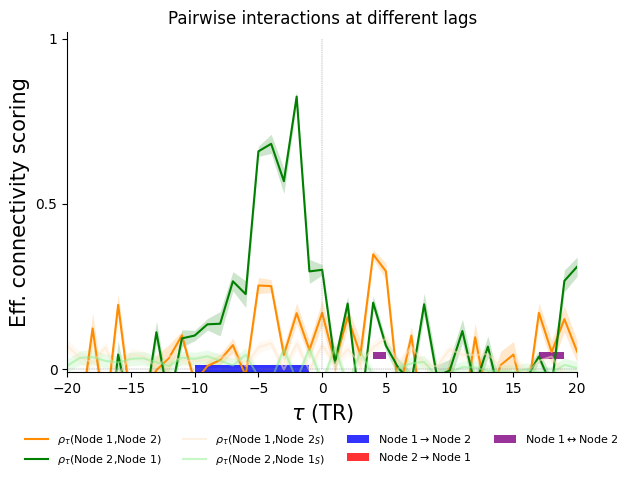

In [ ]:
roi_i, roi_j = 1,2
x_label = r"$\tau$ (TR)"
title = "Pairwise interactions at different lags"
ob.plot_interaction_ij(roi_i, roi_j, x_label=x_label, title=title)

In [ ]:
Gs, As = ob.Lagged_Networks(weighted=True)

In [ ]:
import networkx as nx
nx.get_edge_attributes(Gs[-20], 'weight')

{(1, 2): 0.9962661686166101, (2, 1): 0.0023419586829236507}

In [ ]:
As[-20]

array([[0.        , 0.99626617],
       [0.00234196, 0.        ]])

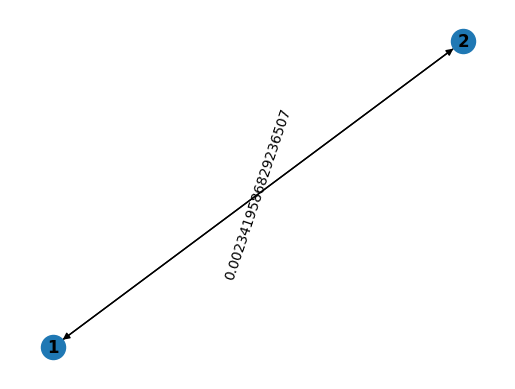

In [ ]:
import networkx as nx
pos = nx.spring_layout(Gs[-20])
labels = nx.get_edge_attributes(Gs[-20],'weight')
nx.draw_networkx_edge_labels(Gs[-20], pos, edge_labels=labels)

# Make the graph
nx.draw(Gs[-20], with_labels=True, font_weight="bold", arrows=True)
